In [1]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, root_mean_squared_error

C:\Users\yjs63\AppData\Local\Temp\ipykernel_19864\1135486040.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df = pd.read_csv('C:/취업준비/스파르타코딩/머신러닝(주피터노트북)/TeamPJT-3/train_train.csv')
type(df['timestamp'][0])
import datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['year'] = df['timestamp'].dt.year
df['month'] = df['timestamp'].dt.month
df['day'] = df['timestamp'].dt.day
df['dayofweek'] = df['timestamp'].dt.dayofweek
df['ttimestampp'] = df['year']+df['month']
df['Index'] = df.index

df

,ID,timestamp,item,corporation,location,supply(kg),price(??kg),year,month,day,dayofweek,ttimestampp,Index
0,TG_A_J_20220131,2022-01-31,TG,A,J,0.0,0,2022,1,31,0,2023,0
1,TG_A_S_20220131,2022-01-31,TG,A,S,0.0,0,2022,1,31,0,2023,1
2,TG_B_J_20220131,2022-01-31,TG,B,J,0.0,0,2022,1,31,0,2023,2
3,TG_B_S_20220131,2022-01-31,TG,B,S,0.0,0,2022,1,31,0,2023,3
4,TG_C_J_20220131,2022-01-31,TG,C,J,0.0,0,2022,1,31,0,2023,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
43948,BC_D_J_20190101,2019-01-01,BC,D,J,0.0,0,2019,1,1,1,2020,43948
43949,BC_E_J_20190101,2019-01-01,BC,E,J,0.0,0,2019,1,1,1,2020,43949
43950,BC_E_S_20190101,2019-01-01,BC,E,S,0.0,0,2019,1,1,1,2020,43950
43951,CB_F_J_20190101,2019-01-01,CB,F,J,0.0,0,2019,1,1,1,2020,43951


In [3]:
RD_data = df[df['item'] == 'RD']
RD_data

,ID,timestamp,item,corporation,location,supply(kg),price(??kg),year,month,day,dayofweek,ttimestampp,Index
21,RD_A_J_20220131,2022-01-31,RD,A,J,0.0,0,2022,1,31,0,2023,21
22,RD_A_S_20220131,2022-01-31,RD,A,S,0.0,0,2022,1,31,0,2023,22
23,RD_C_S_20220131,2022-01-31,RD,C,S,0.0,0,2022,1,31,0,2023,23
24,RD_D_J_20220131,2022-01-31,RD,D,J,0.0,0,2022,1,31,0,2023,24
25,RD_D_S_20220131,2022-01-31,RD,D,S,0.0,0,2022,1,31,0,2023,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...
43938,RD_D_J_20190101,2019-01-01,RD,D,J,0.0,0,2019,1,1,1,2020,43938
43939,RD_D_S_20190101,2019-01-01,RD,D,S,0.0,0,2019,1,1,1,2020,43939
43940,RD_E_J_20190101,2019-01-01,RD,E,J,0.0,0,2019,1,1,1,2020,43940
43941,RD_E_S_20190101,2019-01-01,RD,E,S,0.0,0,2019,1,1,1,2020,43941


<Axes: xlabel='supply(kg)', ylabel='price(??kg)'>

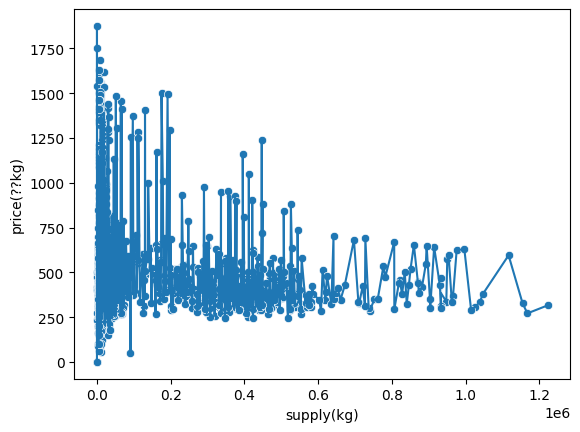

In [4]:
#RD_data.plot()
plt.show()
sns.scatterplot( data = RD_data, x = 'supply(kg)' , y = 'price(??kg)')
sns.lineplot( data = RD_data, x = 'supply(kg)' , y = 'price(??kg)')
#plt.figure(figsize=(40,20))

0.0007080506245907008 134.97435706646908
134.97506511709366


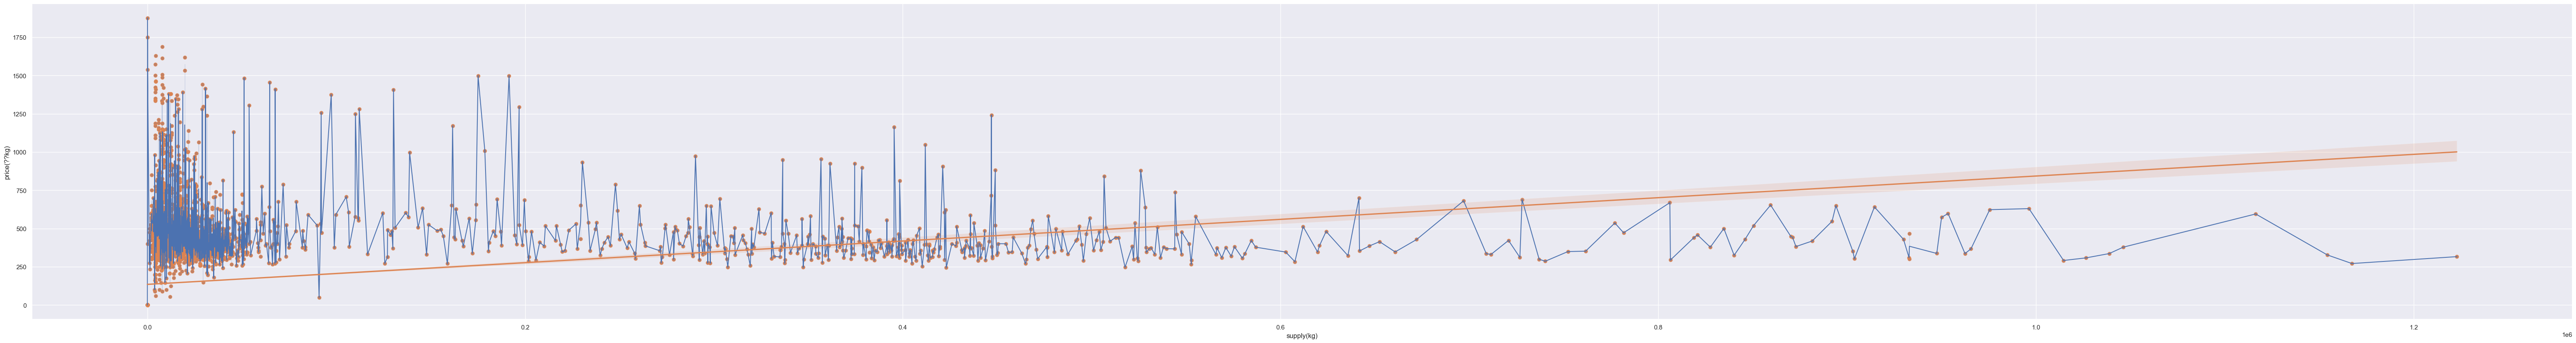

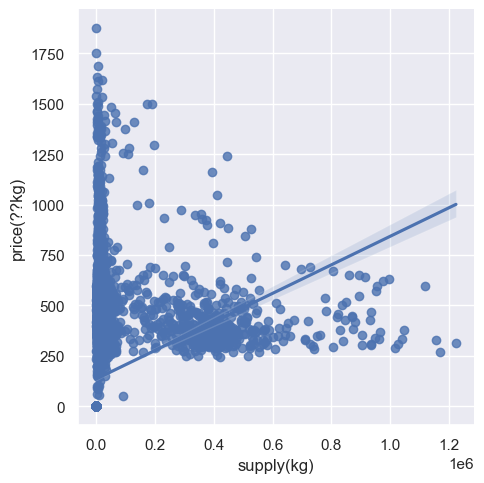

In [5]:
sns.set(rc={"figure.figsize":(80, 10)}) #width=3, #height=4
sns.scatterplot( data = RD_data, x = 'supply(kg)' , y = 'price(??kg)')
sns.lineplot( data = RD_data, x = 'supply(kg)' , y = 'price(??kg)')
sns.regplot( data = RD_data, x = 'supply(kg)' , y = 'price(??kg)')
sns.lmplot( data = RD_data, x = 'supply(kg)' , y = 'price(??kg)')
z=np.polyfit(RD_data['supply(kg)'], RD_data['price(??kg)'], 1)
f=np.poly1d(z)
print(z[0], z[1])
print(f(1))

In [6]:
from sklearn.linear_model import LinearRegression
model_lr = LinearRegression()
type(model_lr)
prsu_df = RD_data[['supply(kg)', 'price(??kg)']]
model_lr.fit(RD_data[['supply(kg)']], RD_data['price(??kg)'])
y_pred = model_lr.predict(RD_data[['supply(kg)']])


In [7]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(RD_data['price(??kg)'], y_pred)


192.04725084596302

In [8]:
from sklearn.metrics import mean_squared_error 
mean_squared_error(RD_data['price(??kg)'], y_pred)

59228.484569092725

In [9]:
from sklearn.metrics import mean_squared_error 
MSE = mean_squared_error(RD_data['price(??kg)'], y_pred) 

In [10]:
from sklearn.metrics import mean_squared_error 
MSE = mean_squared_error(RD_data['price(??kg)'], y_pred) 
MSE ** 0.5

243.36902960132934

In [11]:
from sklearn.metrics import mean_squared_log_error
mean_squared_log_error(RD_data['price(??kg)'], y_pred)

16.82179511981949

In [12]:
print(model_lr.intercept_)
r2_score(RD_data['price(??kg)'], y_pred)

134.9743570664735


0.08489917294122562